## clean_organic_smiles

In [1]:
from rdkit.Chem.Draw import IPythonConsole 
from rdkit.Chem import Draw #RDKit drawing
# A few settings to improve the quality of structures 
from rdkit.Chem import rdDepictor
IPythonConsole.ipython_useSVG = True
rdDepictor.SetPreferCoordGen(True) # more consistent 2D layouts

In [2]:
import pandas as pd

data = [
    # Organic with salt
    ('Ibuprofen Sodium', 'CC(C)Cc1ccc(cc1)C(C)C(=O)[O-].[Na+]'),
    ('Lidocaine HCl', 'CCN(CCOC(=O)c1cccc(c1)N(C)C)C.[Cl-]'),
    ('Bupivacaine Salt', 'CCC(C)N1CCC(CC1)C(=O)Oc2ccc(cc2)Cl.[Cl-]'),
    ('Sodium Laurate', 'CCCCCCCCCCCCC(=O)[O-].[Na+]'),
    ('Potassium Pivalate', 'CC(C)(C)C(=O)[O-].[K+]'),
    ('Protonated Base', 'CN1CCC(CC1)OC(=O)c2ccccc2.[H+]'),
    ('Aspirin Sodium', 'CC(=O)Oc1ccccc1C(=O)[O-].[Na+]'),
    ('Phenylalanine HCl', 'N[C@@H](Cc1ccccc1)C(=O)O.[Cl-]'),
    ('Ether Sodium Salt', 'COc1ccccc1O[Na]'),
    ('Potassium Isovalerate', 'CC(C)CC(=O)[O-].[K+]'),
    ('Cetirizine HCl', 'CN1CCC(CC1)C(C2=CC=CC=C2Cl)C(=O)OCC3=CC=CC=C3N.[Cl-]'),
    ('Diphenhydramine HCl', 'CN(C)CCOC(c1ccccc1)c2ccccc2.[Cl-]'),
    ('Metformin HCl', 'CN(C)C(=N)NC(=N)N.[Cl-]'),
    ('Sertraline HCl', 'CN1CCC(CC1)C2=CC=CC=C2Cl.[Cl-]'),
    ('Promethazine HCl', 'CN(C)CCCN1c2ccccc2Sc3ccccc13.[Cl-]'),
    ('Cimetidine HCl', 'CNC(=N)NCCSc1ncnc1N.[Cl-]'),
    ('Amoxicillin Sodium', 'CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)Cc3ccccc3)C(=O)N2C1=O.[Na+]'),
    ('Clavulanic Acid Potassium', 'CC1(C(=O)NC2=C1C=CO2)C(=O)[O-].[K+]'),
    ('Penicillin G Potassium', 'CC1(C)S[C@@H]2[C@H](NC(=O)Cc3ccccc3)C(=O)N2C1=O.[K+]'),
    ('Ticarcillin Disodium', 'CC1(C(=O)NC(=O)Cc2ccccc2)S[C@@H]2[C@H](NC(=O)CO)C(=O)N12.[Na+].[Na+]'),
    ('L-Carnitine HCl', 'C[N+](C)(C)C[C@H](OC(=O)C(C)(C)CO)O.[Cl-]'),
    ('Hydroxyzine HCl', 'CN(C)CCOC(c1ccccc1)CN1CCc2ccccc2C1.[Cl-]'),
    ('Lisinopril Dihydrochloride', 'CC(C)C[C@@H](C(=O)N1CCC[C@H]1C(=O)O)N2CCCC2C(=O)O.[Cl-].[Cl-]'),
    ('Leucine HCl', 'CC(C)C[C@H](N)C(=O)O.[Cl-]'),
    ('Glutamic Acid HCl', 'N[C@@H](CCC(=O)O)C(=O)O.[Cl-]'),
    ('Arginine HCl', 'N=C(N)NCCC[C@H](N)C(=O)O.[Cl-]'),
    ('Creatine HCl', 'CN(CC(=O)O)C(=N)N.[Cl-]'),
    ('Histidine HCl', 'N[C@@H](Cc1cnc[nH]1)C(=O)O.[Cl-]'),
    ('Duloxetine HCl', 'CN(C)CCOc1ccc(cc1)[C@H](c2ccccc2)C#N.[Cl-]'),
    ('Ondansetron HCl', 'CN1CCOC(c2ccccc2)c3ccccc13.[Cl-]'),

    # Organic no salt
    ('Acetanilide', 'CC(=O)Nc1ccccc1'),
    ('Beta Blocker Analog', 'CC(C)NCC(O)COc1ccccc1'),
    ('Aryl Ethyl Ester', 'CCOC(=O)c1ccc(cc1)Cl'),
    ('Anesthetic Base', 'CCN(CC)CCCC(C)Nc1ccccc1'),
    ('Aliphatic Amide', 'CCC(C)NC(=O)c1ccccc1'),
    ('Tyrosine', 'N[C@@H](Cc1ccc(O)cc1)C(=O)O'),
    ('Long Amino Acid', 'CC(C)C(=O)NCCc1c[nH]c2ccccc12'),
    ('Barbiturate Derivative', 'CN1C(=O)NC(=O)c2cc(Cl)ccc21'),
    ('Tricyclic Compound', 'C1CC2=CC=CC=C2C3=CC=CC=C31'),
    ('Polyether Scaffold', 'COCCOCCO'),
    # Inorganics
    ('Iron(II) Chloride', '[Fe+2].[Cl-].[Cl-]'),
    ('Cobalt Sulfate', '[Co+2].[O-]S(=O)(=O)[O-]'),
    ('Copper(II) Chloride', '[Cu+2].[Cl-].[Cl-]'),
    ('Sodium Trichloroacetate', '[Na+].[O-]C(=O)C(Cl)(Cl)Cl'),
    ('Magnesium Chloride', '[Mg+2].[Cl-].[Cl-]'),
    ('Zinc Chloride', '[Zn+2].[Cl-].[Cl-]'),
    ('Barium Nitrate', '[Ba+2].[O-][N+](=O)[O-].[O-][N+](=O)[O-]'),
    ('Calcium Chloride', '[Ca+2].[Cl-].[Cl-]'),
    ('Aluminum Chloride', '[Al+3].[Cl-].[Cl-].[Cl-]'),
    ('Potassium Benzoate', '[K+].[O-]C(=O)c1ccccc1'),
    ('Water', 'O'),
    ('Hydrogen Peroxide', 'OO'),
    ('Ammonia', 'N'),
    ('Nitric Acid', 'O[N+](=O)[O-]'),
    ('Sulfuric Acid', 'OS(=O)(=O)O'),
    ('Hydrofluoric Acid', 'F'),
    ('Hydrochloric Acid', 'Cl'),
    ('Hydrobromic Acid', 'Br'),
    ('Iodine', 'I'),
    ('Phosphoric Acid', 'OP(=O)(O)O')
]

# Create DataFrame
df_compounds = pd.DataFrame(data, columns=['name', 'smiles'])

# Display the DataFrame
df_compounds 


,name,smiles
0,Ibuprofen Sodium,CC(C)Cc1ccc(cc1)C(C)C(=O)[O-].[Na+]
1,Lidocaine HCl,CCN(CCOC(=O)c1cccc(c1)N(C)C)C.[Cl-]
2,Bupivacaine Salt,CCC(C)N1CCC(CC1)C(=O)Oc2ccc(cc2)Cl.[Cl-]
3,Sodium Laurate,CCCCCCCCCCCCC(=O)[O-].[Na+]
4,Potassium Pivalate,CC(C)(C)C(=O)[O-].[K+]
5,Protonated Base,CN1CCC(CC1)OC(=O)c2ccccc2.[H+]
6,Aspirin Sodium,CC(=O)Oc1ccccc1C(=O)[O-].[Na+]
7,Phenylalanine HCl,N[C@@H](Cc1ccccc1)C(=O)O.[Cl-]
8,Ether Sodium Salt,COc1ccccc1O[Na]
9,Potassium Isovalerate,CC(C)CC(=O)[O-].[K+]


In [3]:
df_compounds = df_compounds.sample(frac=1).reset_index(drop=True)
df_compounds  # Preview after shuffle

,name,smiles
0,Ticarcillin Disodium,CC1(C(=O)NC(=O)Cc2ccccc2)S[C@@H]2[C@H](NC(=O)C...
1,Magnesium Chloride,[Mg+2].[Cl-].[Cl-]
2,Sulfuric Acid,OS(=O)(=O)O
3,Protonated Base,CN1CCC(CC1)OC(=O)c2ccccc2.[H+]
4,Sertraline HCl,CN1CCC(CC1)C2=CC=CC=C2Cl.[Cl-]
5,Iron(II) Chloride,[Fe+2].[Cl-].[Cl-]
6,Metformin HCl,CN(C)C(=N)NC(=N)N.[Cl-]
7,Arginine HCl,N=C(N)NCCC[C@H](N)C(=O)O.[Cl-]
8,Zinc Chloride,[Zn+2].[Cl-].[Cl-]
9,Sodium Trichloroacetate,[Na+].[O-]C(=O)C(Cl)(Cl)Cl


In [4]:
from rdkit import Chem

In [5]:
smi = 'N[C@@H](CCC(=O)O)C(=O)O.[Cl-]'
mol = Chem.MolFromSmiles(smi)

In [6]:
for atom in mol.GetAtoms():
    print(atom.GetSymbol())

N
C
C
C
C
O
O
C
O
O
Cl


In [7]:
print(mol.GetNumAtoms())

11


In [8]:
# split the smiles to get individual structures

In [9]:
from rdkit.Chem import PandasTools
smi_list = smi.split('.')
print(smi_list)

['N[C@@H](CCC(=O)O)C(=O)O', '[Cl-]']


In [10]:
# convert each structure to molecule and get its atom cound
atom_count = [Chem.MolFromSmiles(each_smi).GetNumAtoms() for each_smi in smi_list]
atom_count

[10, 1]

In [11]:
# Get index of the structure with the most number of atoms
long_i = atom_count.index(max(atom_count))
print(long_i,smi_list[long_i])

0 N[C@@H](CCC(=O)O)C(=O)O


In [12]:
# def extract_active_ingredient(smi):
#     smi_list = smi.split('.')
#     atom_count = [Chem.MolFromSmiles(each_smi).GetNumAtoms() for each_smi in smi_list]
#     longest_i = atom_count.index(max(atom_count))
#     return smi_list[longest_i]

In [13]:
# for index,row in df_compounds.iterrows():
#     smi = row['smiles']
#     if '.' in smi:
#         smi = extract_active_ingredient(smi)
#         df_compounds.loc[index,'smiles'] = smi

### Removing salts

In [14]:
from rdkit import Chem

def extract_active_ingredient(smi):
    smi_list = smi.split('.')
    mols = []

    for each_smi in smi_list:
        mol = Chem.MolFromSmiles(each_smi)
        if mol:  # Valid molecule
            mols.append((each_smi, mol.GetNumAtoms()))

    if not mols:
        return None  # Or handle with placeholder
    return max(mols, key=lambda x: x[1])[0]  # Return largest fragment

# Apply the function to whole column
df_compounds['smiles_clean'] = df_compounds['smiles'].apply(extract_active_ingredient)


[19:26:18] WARNING: not removing hydrogen atom without neighbors
[19:26:18] Can't kekulize mol.  Unkekulized atoms: 8 9 10 11 12


In [15]:
df_compounds

,name,smiles,smiles_clean
0,Ticarcillin Disodium,CC1(C(=O)NC(=O)Cc2ccccc2)S[C@@H]2[C@H](NC(=O)C...,CC1(C(=O)NC(=O)Cc2ccccc2)S[C@@H]2[C@H](NC(=O)C...
1,Magnesium Chloride,[Mg+2].[Cl-].[Cl-],[Mg+2]
2,Sulfuric Acid,OS(=O)(=O)O,OS(=O)(=O)O
3,Protonated Base,CN1CCC(CC1)OC(=O)c2ccccc2.[H+],CN1CCC(CC1)OC(=O)c2ccccc2
4,Sertraline HCl,CN1CCC(CC1)C2=CC=CC=C2Cl.[Cl-],CN1CCC(CC1)C2=CC=CC=C2Cl
5,Iron(II) Chloride,[Fe+2].[Cl-].[Cl-],[Fe+2]
6,Metformin HCl,CN(C)C(=N)NC(=N)N.[Cl-],CN(C)C(=N)NC(=N)N
7,Arginine HCl,N=C(N)NCCC[C@H](N)C(=O)O.[Cl-],N=C(N)NCCC[C@H](N)C(=O)O
8,Zinc Chloride,[Zn+2].[Cl-].[Cl-],[Zn+2]
9,Sodium Trichloroacetate,[Na+].[O-]C(=O)C(Cl)(Cl)Cl,[O-]C(=O)C(Cl)(Cl)Cl


In [16]:
# Convert the SMILES column to RDKit Mol objects using PandasTools
PandasTools.AddMoleculeColumnToFrame(df_compounds, smilesCol='smiles_clean', molCol='Molecule')

,name,smiles,smiles_clean,Molecule
0,Ticarcillin Disodium,CC1(C(=O)NC(=O)Cc2ccccc2)S[C@@H]2[C@H](NC(=O)C...,CC1(C(=O)NC(=O)Cc2ccccc2)S[C@@H]2[C@H](NC(=O)C...,
1,Magnesium Chloride,[Mg+2].[Cl-].[Cl-],[Mg+2],
2,Sulfuric Acid,OS(=O)(=O)O,OS(=O)(=O)O,
3,Protonated Base,CN1CCC(CC1)OC(=O)c2ccccc2.[H+],CN1CCC(CC1)OC(=O)c2ccccc2,
4,Sertraline HCl,CN1CCC(CC1)C2=CC=CC=C2Cl.[Cl-],CN1CCC(CC1)C2=CC=CC=C2Cl,
5,Iron(II) Chloride,[Fe+2].[Cl-].[Cl-],[Fe+2],
6,Metformin HCl,CN(C)C(=N)NC(=N)N.[Cl-],CN(C)C(=N)NC(=N)N,
7,Arginine HCl,N=C(N)NCCC[C@H](N)C(=O)O.[Cl-],N=C(N)NCCC[C@H](N)C(=O)O,
8,Zinc Chloride,[Zn+2].[Cl-].[Cl-],[Zn+2],
9,Sodium Trichloroacetate,[Na+].[O-]C(=O)C(Cl)(Cl)Cl,[O-]C(=O)C(Cl)(Cl)Cl,

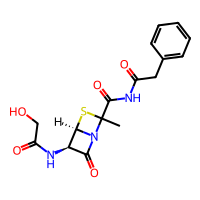
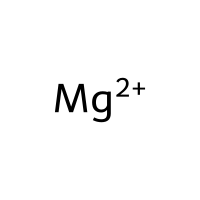
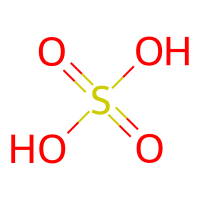
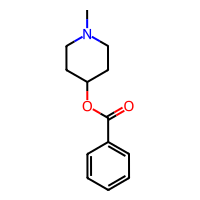
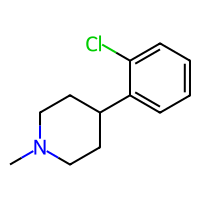
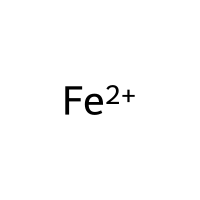
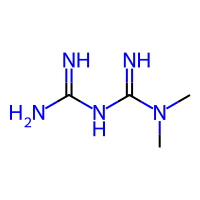
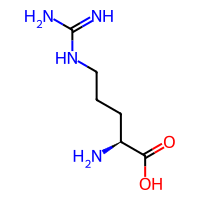
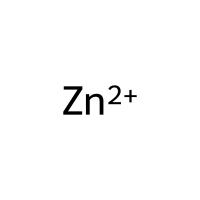
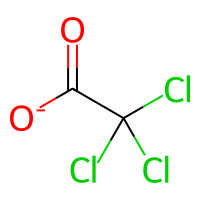
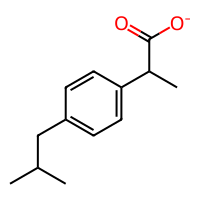
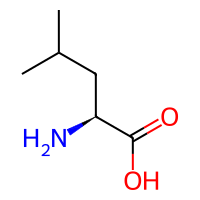
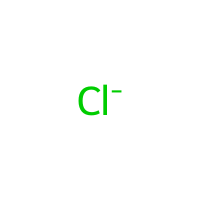
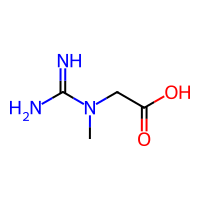
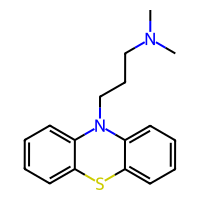
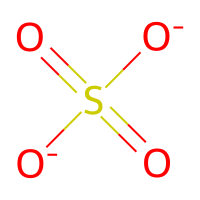
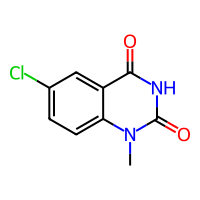
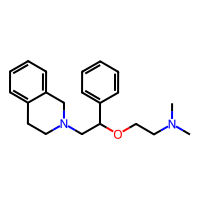
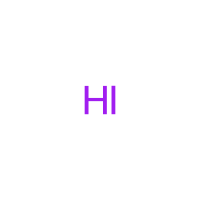
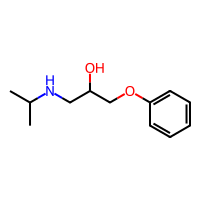
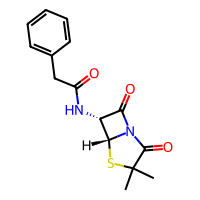
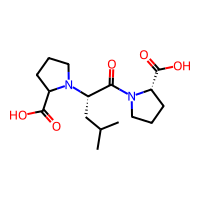
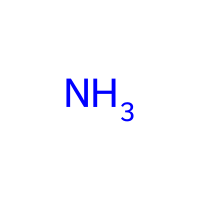
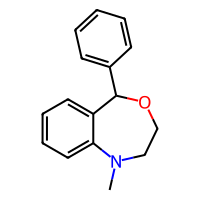
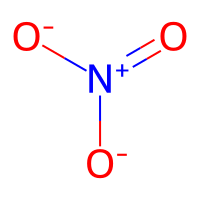
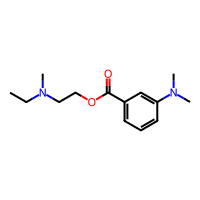
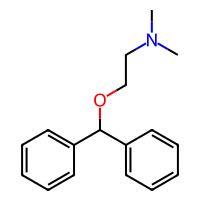
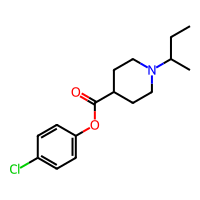
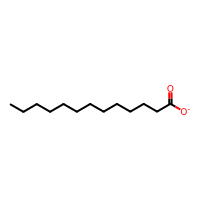
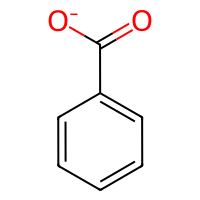
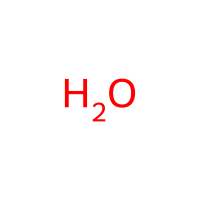
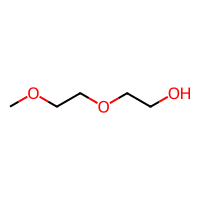
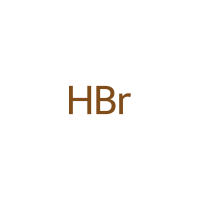
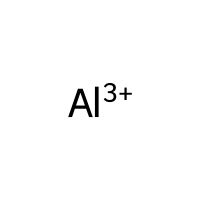
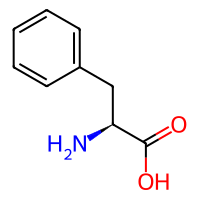
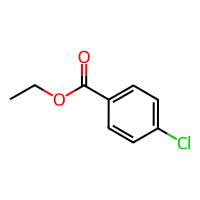
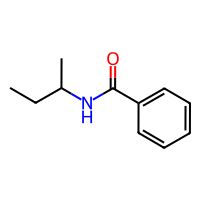
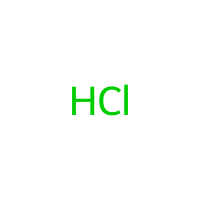
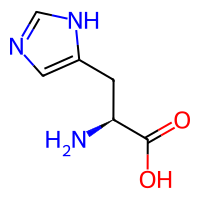
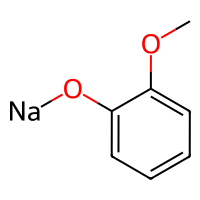
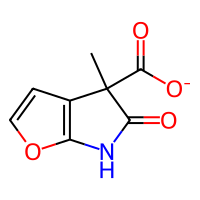
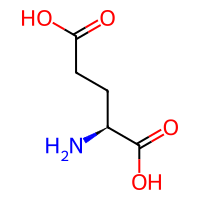
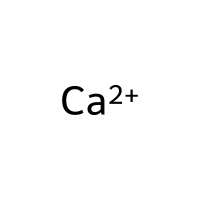
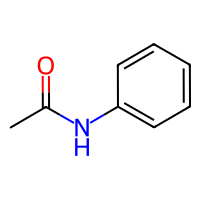
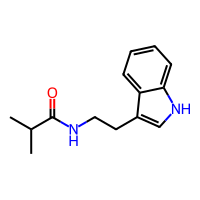
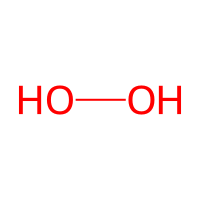
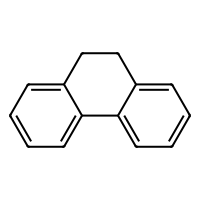
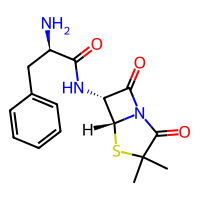
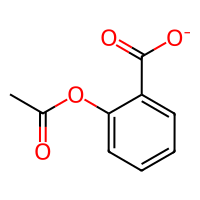
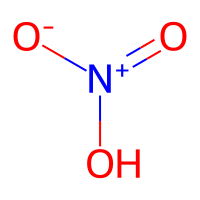
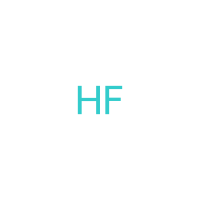
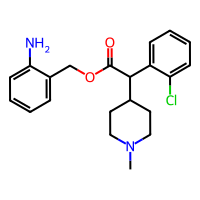
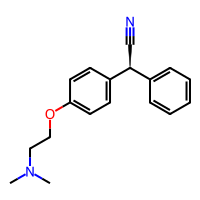
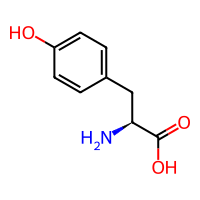
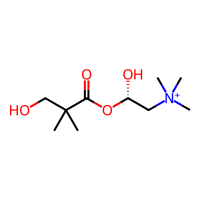
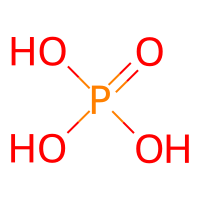
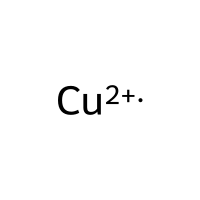
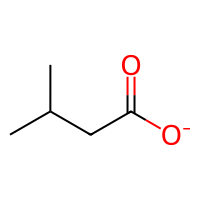
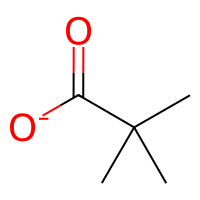
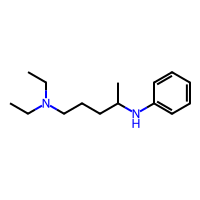

In [17]:
df_compounds

In [18]:
count = 0
for index,row in df_compounds.iterrows():
    smi = row['smiles_clean']
    if '.' in smi:
        count +=1
print(count)
    


0


### Removing inorganic molecules

In [19]:
# List of organic elements
organic = ['H', 'C', 'N', 'O', 'F', 'P', 'S', 'Cl', 'Br', 'I']

organic_smi_list = []
inorganic_smi_list = []

# Loop through each row in the DataFrame
for index, row in df_compounds.iterrows():
    smi = row['smiles_clean']  # Access the 'smi' column
    mol = Chem.MolFromSmiles(smi)  # Generate the molecule from SMILES
    if mol:
            # Get the atom symbols for all atoms in the molecule
        atom_symbol_list = [atom.GetSymbol() for atom in mol.GetAtoms()]
            # Check if all atom symbols are in the organic list
        if all(atom_symbol in organic for atom_symbol in atom_symbol_list):
                organic_smi_list.append(index)
        else:
                inorganic_smi_list.append(index)

# Access the rows that contain organic molecules
organic_df = df_compounds.loc[organic_smi_list, :]

In [20]:
organic_df

,name,smiles,smiles_clean,Molecule
0,Ticarcillin Disodium,CC1(C(=O)NC(=O)Cc2ccccc2)S[C@@H]2[C@H](NC(=O)C...,CC1(C(=O)NC(=O)Cc2ccccc2)S[C@@H]2[C@H](NC(=O)C...,<rdkit.Chem.rdchem.Mol object at 0x12bc2f580>
2,Sulfuric Acid,OS(=O)(=O)O,OS(=O)(=O)O,<rdkit.Chem.rdchem.Mol object at 0x12bc2ff90>
3,Protonated Base,CN1CCC(CC1)OC(=O)c2ccccc2.[H+],CN1CCC(CC1)OC(=O)c2ccccc2,<rdkit.Chem.rdchem.Mol object at 0x12bc2ff20>
4,Sertraline HCl,CN1CCC(CC1)C2=CC=CC=C2Cl.[Cl-],CN1CCC(CC1)C2=CC=CC=C2Cl,<rdkit.Chem.rdchem.Mol object at 0x12bc2fa50>
6,Metformin HCl,CN(C)C(=N)NC(=N)N.[Cl-],CN(C)C(=N)NC(=N)N,<rdkit.Chem.rdchem.Mol object at 0x12bc2fcf0>
7,Arginine HCl,N=C(N)NCCC[C@H](N)C(=O)O.[Cl-],N=C(N)NCCC[C@H](N)C(=O)O,<rdkit.Chem.rdchem.Mol object at 0x12bc2f2e0>
9,Sodium Trichloroacetate,[Na+].[O-]C(=O)C(Cl)(Cl)Cl,[O-]C(=O)C(Cl)(Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x12bc2fe40>
10,Ibuprofen Sodium,CC(C)Cc1ccc(cc1)C(C)C(=O)[O-].[Na+],CC(C)Cc1ccc(cc1)C(C)C(=O)[O-],<rdkit.Chem.rdchem.Mol object at 0x12bc2feb0>
11,Leucine HCl,CC(C)C[C@H](N)C(=O)O.[Cl-],CC(C)C[C@H](N)C(=O)O,<rdkit.Chem.rdchem.Mol object at 0x12bc2fc10>
12,Cimetidine HCl,CNC(=N)NCCSc1ncnc1N.[Cl-],[Cl-],<rdkit.Chem.rdchem.Mol object at 0x12bd50f90>


In [21]:
organic_df.columns

Index(['name', 'smiles', 'smiles_clean', 'Molecule'], dtype='object')

In [22]:
# # compounds with 'C' atoms
# for index,row in organic_df.iterrows():
#     smi = row['smiles_clean']
#     mol = Chem.MolFromSmiles(smi)
#     if mol:
#         atoms_symbol_list = [atom.GetSymbol() for atom in mol.GetAtoms()]
#         if 'C' in atoms_symbol_list:
#             pass
#         else:
#             organic_smi_list.remove(index)
#             inorganic_smi_list.append(index)
# organic_df.loc[organic_smi_list,:]

### Ensuring presence of carbon atoms

In [23]:
new_organic_indices = []

for index, row in organic_df.iterrows():
    smi = row['smiles_clean']
    mol = Chem.MolFromSmiles(smi)
    if mol:
        atom_symbols = [atom.GetSymbol() for atom in mol.GetAtoms()]
        if 'C' in atom_symbols:
            new_organic_indices.append(index)
        else:
            inorganic_smi_list.append(index)

organic_df = df_compounds.loc[new_organic_indices]


In [24]:
organic_df = organic_df.reset_index(drop = True)
organic_df

,name,smiles,smiles_clean,Molecule
0,Ticarcillin Disodium,CC1(C(=O)NC(=O)Cc2ccccc2)S[C@@H]2[C@H](NC(=O)C...,CC1(C(=O)NC(=O)Cc2ccccc2)S[C@@H]2[C@H](NC(=O)C...,<rdkit.Chem.rdchem.Mol object at 0x12bc2f580>
1,Protonated Base,CN1CCC(CC1)OC(=O)c2ccccc2.[H+],CN1CCC(CC1)OC(=O)c2ccccc2,<rdkit.Chem.rdchem.Mol object at 0x12bc2ff20>
2,Sertraline HCl,CN1CCC(CC1)C2=CC=CC=C2Cl.[Cl-],CN1CCC(CC1)C2=CC=CC=C2Cl,<rdkit.Chem.rdchem.Mol object at 0x12bc2fa50>
3,Metformin HCl,CN(C)C(=N)NC(=N)N.[Cl-],CN(C)C(=N)NC(=N)N,<rdkit.Chem.rdchem.Mol object at 0x12bc2fcf0>
4,Arginine HCl,N=C(N)NCCC[C@H](N)C(=O)O.[Cl-],N=C(N)NCCC[C@H](N)C(=O)O,<rdkit.Chem.rdchem.Mol object at 0x12bc2f2e0>
5,Sodium Trichloroacetate,[Na+].[O-]C(=O)C(Cl)(Cl)Cl,[O-]C(=O)C(Cl)(Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x12bc2fe40>
6,Ibuprofen Sodium,CC(C)Cc1ccc(cc1)C(C)C(=O)[O-].[Na+],CC(C)Cc1ccc(cc1)C(C)C(=O)[O-],<rdkit.Chem.rdchem.Mol object at 0x12bc2feb0>
7,Leucine HCl,CC(C)C[C@H](N)C(=O)O.[Cl-],CC(C)C[C@H](N)C(=O)O,<rdkit.Chem.rdchem.Mol object at 0x12bc2fc10>
8,Creatine HCl,CN(CC(=O)O)C(=N)N.[Cl-],CN(CC(=O)O)C(=N)N,<rdkit.Chem.rdchem.Mol object at 0x12bd50040>
9,Promethazine HCl,CN(C)CCCN1c2ccccc2Sc3ccccc13.[Cl-],CN(C)CCCN1c2ccccc2Sc3ccccc13,<rdkit.Chem.rdchem.Mol object at 0x12bd500b0>


In [25]:
organic_df = organic_df.iloc[:,2:]

In [29]:
organic_df = organic_df.copy()

In [30]:
PandasTools.AddMoleculeColumnToFrame(organic_df, smilesCol='smiles_clean', molCol='Molecule')

,smiles_clean,Molecule
0,CN1CCOC(c2ccccc2)c3ccccc13,
1,CC(C)CC(=O)[O-],
2,C[N+](C)(C)C[C@H](OC(=O)C(C)(C)CO)O,
3,CN(C)CCOc1ccc(cc1)[C@H](c2ccccc2)C#N,
4,CC(C)NCC(O)COc1ccccc1,
5,CN(CC(=O)O)C(=N)N,
6,CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)Cc3ccccc3)C(...,
7,CC(=O)Oc1ccccc1C(=O)[O-],
8,CC(=O)Nc1ccccc1,
9,COCCOCCO,

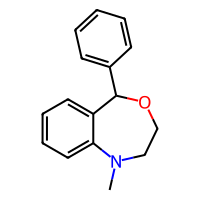
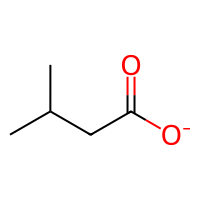
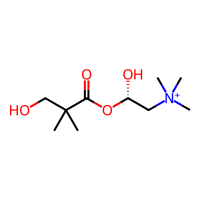
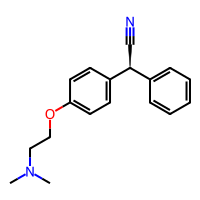
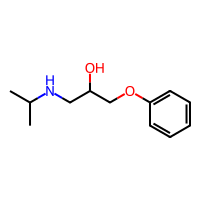
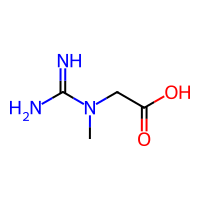
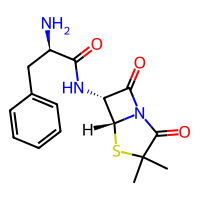
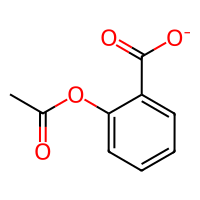
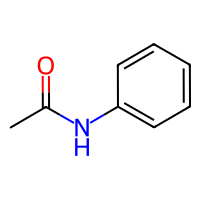
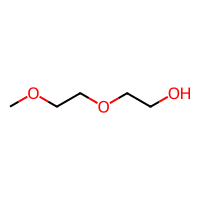
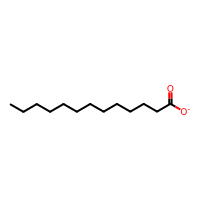
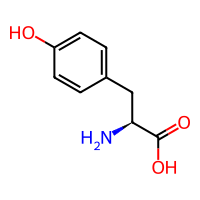
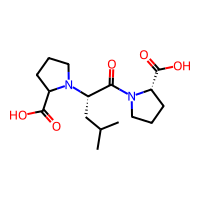
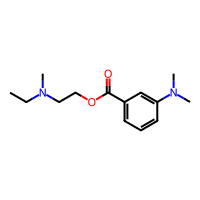
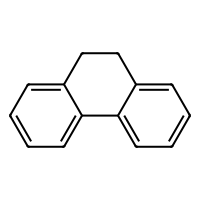
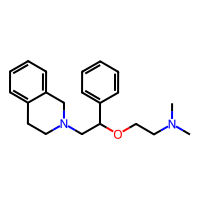
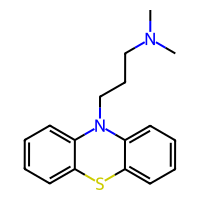
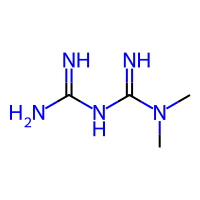
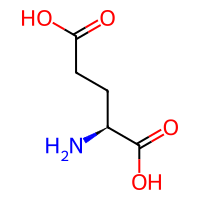
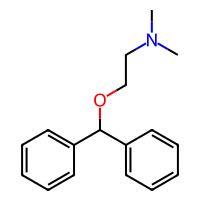
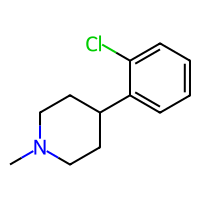
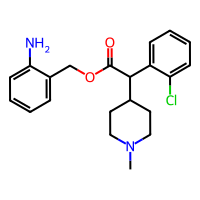
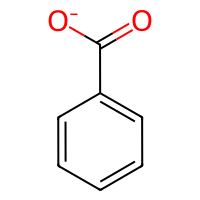
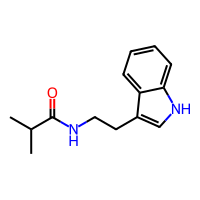
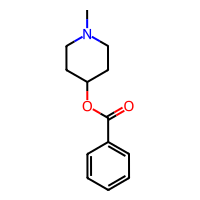
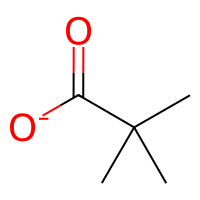
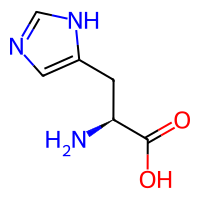
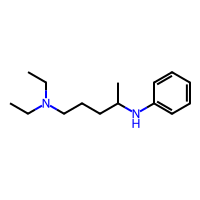
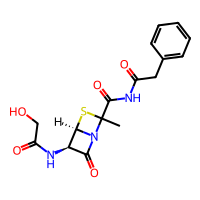
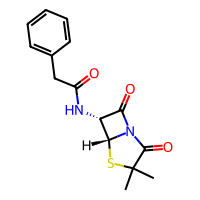
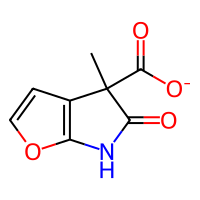
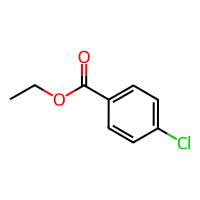
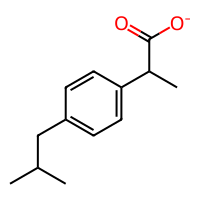
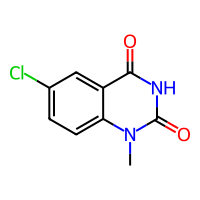
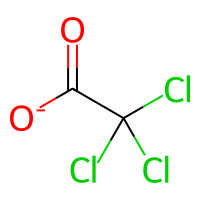
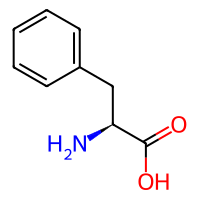
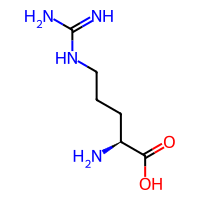
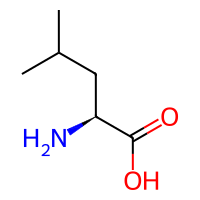
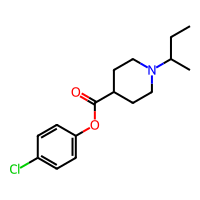
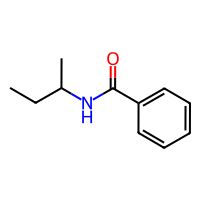

In [41]:
organic_df